## Flights disasters analysis 1919-2023

In [1]:
# loadings libraries 
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\aless\AppData\Local\Temp\ipykernel_19228\1209091596.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# upload the file
df = pd.read_csv('aviation-accidents.csv')

### Dataset analysis

In [3]:
df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [4]:
df.info()
'''
the loaded dataframe has 23967 observations, 9 variables, all of object type, such as "registration, "fatalities," "operator," and "location" it can be seen that values are missing
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


'\nthe loaded dataframe has 23967 observations, 9 variables, all of object type, such as "registration, "fatalities," "operator," and "location" it can be seen that values are missing\n'

### Cleaning the dataset

In [5]:
# check the type of variables
df.dtypes

date            object
type            object
registration    object
operator        object
fatalities      object
location        object
country         object
cat             object
year            object
dtype: object

In [6]:
# counting missing values 
df.isnull().sum()

date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64

In [7]:
'''
Being data of records very accurate, I do not find it appropriate to replace them with averages, or other statitics.
The most appropriate method, in this case, would be to assign zero where the value is missing, so that 
entire rows of the dataset are not lost.
'''

df['fatalities'] = df['fatalities'].fillna(0)
df['date'] = df['date'].fillna(0)
df['registration'] = df['registration'].fillna(0)
df['operator'] = df['operator'].fillna(0)
df['location'] = df['location'].fillna(0)


In [8]:
# Recheck the missing values
df.isnull().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

In [9]:
'''
trasformation the number of deaths into a float type and no longer into objects
'''
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')

In [10]:
df.dtypes

date             object
type             object
registration     object
operator         object
fatalities      float64
location         object
country          object
cat              object
year             object
dtype: object

In [11]:
'''
there are some "unknow" values that do not allow the transformation of some variables, 
it is decided to delete this rows
'''
df = df[df['date'] != 'date unk.']
df = df[df['date'] != '??-???-1923']
df = df[df['year'] != 'unknown']
df = df[df['country']!= 'Unknown country']

In [12]:
'''
transformating year and date from "object" to "datetime" type
'''
df['date']=pd.to_datetime(df['date'], errors= 'coerce')
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['year'] = pd.to_datetime(df['year']).dt.year

C:\Users\aless\AppData\Local\Temp\ipykernel_19228\3396077448.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']=pd.to_datetime(df['date'], errors= 'coerce')


In [13]:
df.dtypes

date            datetime64[ns]
type                    object
registration            object
operator                object
fatalities             float64
location                object
country                 object
cat                     object
year                     int32
dtype: object

### Graphic analysis of dataset

##### Where the most accidents have occured since 1919


In [14]:
# number of accidents by nation
accidents_by_country=df['country'].value_counts()
country = accidents_by_country.idxmax()
accidents = accidents_by_country.max()
top_country = accidents_by_country.head(10)
print(f'The country with the highest number of accidents was {country}, there were {accidents} accidents.\n')
print(top_country)

The country with the highest number of accidents was USA, there were 4377 accidents.

country
USA         4377
Russia      1409
U.K.         837
Canada       826
India        699
Brazil       609
France       549
Germany      516
China        514
Colombia     457
Name: count, dtype: int64


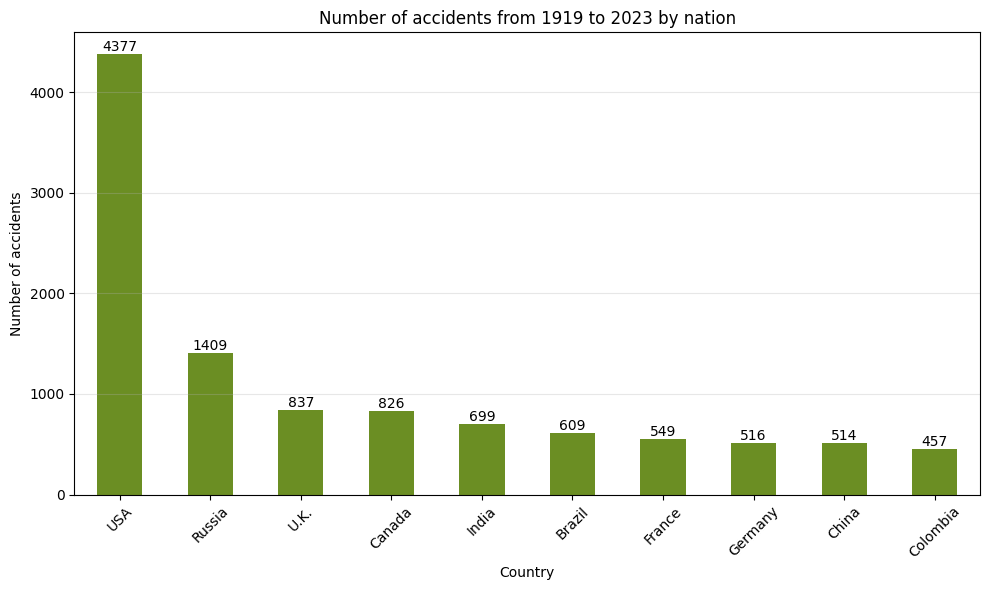

In [15]:
# bar chart that shows the number of accident from 1919 to 2023 by nation
plt.figure(figsize=(10,6))
top_country.plot(kind='bar', color ='#6B8E23')
for index,value in enumerate(top_country):
    plt.annotate(str(int(value)), xy=(index,value), ha='center', va='bottom')
plt.title("Number of accidents from 1919 to 2023 by nation")
plt.xlabel('Country')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

##### COMMENT
The graph shows that the nation where the most accidents occurred is the U.S. with 4377, followed by Russia with 1409, and Britain and Canada with more than 800.


#### In which year did the largest number of accidents occur


In [16]:
# number of accidents by year
accidents_by_year = df['year'].value_counts().sort_index()
accidents_by_year.loc[1939:1948]

year
1939      68
1940     316
1941     226
1942     365
1943     699
1944    1382
1945    1169
1946     360
1947     288
1948     295
Name: count, dtype: int64

In [17]:
accidents_by_year.loc[1968:1970]

year
1968    298
1969    382
1970    343
Name: count, dtype: int64

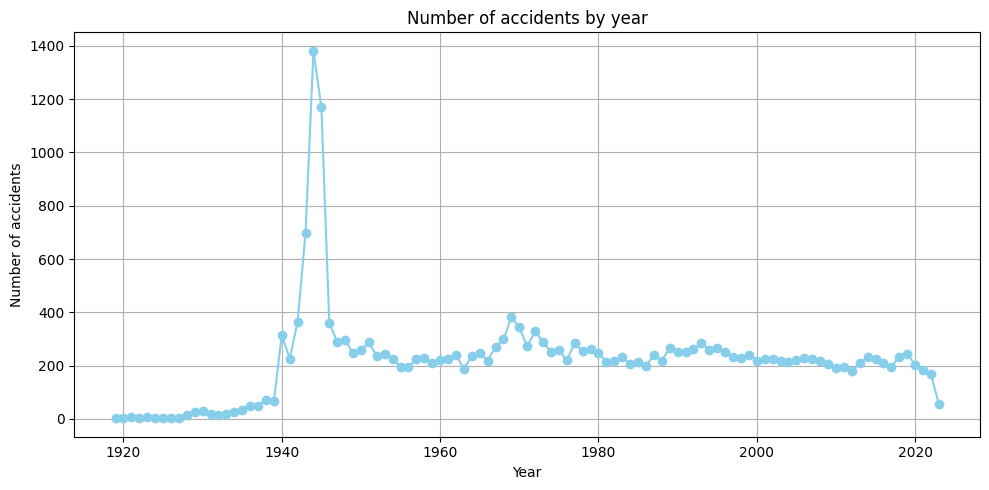

In [18]:
# line chart that shows the number of accidents by year
plt.figure(figsize=(10,5))
accidents_by_year.plot(kind='line', marker='o', color='skyblue')
plt.title("Number of accidents by year")
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

##### COMMENT
This graph shows that during the period of World War II there was a peak in the number of incidents, in fact in 1944 there were
almost 1400 incidents, and in 1945 1169, before the war the number was not very high, presumably because the amount of aircraft and flights made was very low;
between 1968-1970 they slightly increased compared to previous years, in fact in the post-World War II period all countries were recovering and from the 1960s a prosperous climate began, people started to move again and the number of flights increased and so did the number of accidents. Another explanation could be had with war in Vietnam that the United States was fighting between '55 and '75.
In recent years the average number of accidents has decreased, it is around 200 accidents per year worldwide; globally during the covid period there was no evidence of a decrease in accidents.

#### Which operators are the safest

In [19]:
'''
check who is the worst operator
'''
#  number of accidents for each operator
accidents_by_operator = df['operator'].value_counts()
operator = accidents_by_operator.idxmax()
accidents = accidents_by_operator.max()
top_operator=accidents_by_operator[:10]
print(f'The operator with the highest number of accidents is {operator}, it caused {accidents} accidents.\n')
print(top_operator)


The operator with the highest number of accidents is USAAF, it caused 2170 accidents.

operator
USAAF         2170
USAF          1066
RAF            895
US Navy        709
German AF      497
private        296
Aeroflot       189
Unknown        174
Air France     137
Soviet AF      134
Name: count, dtype: int64


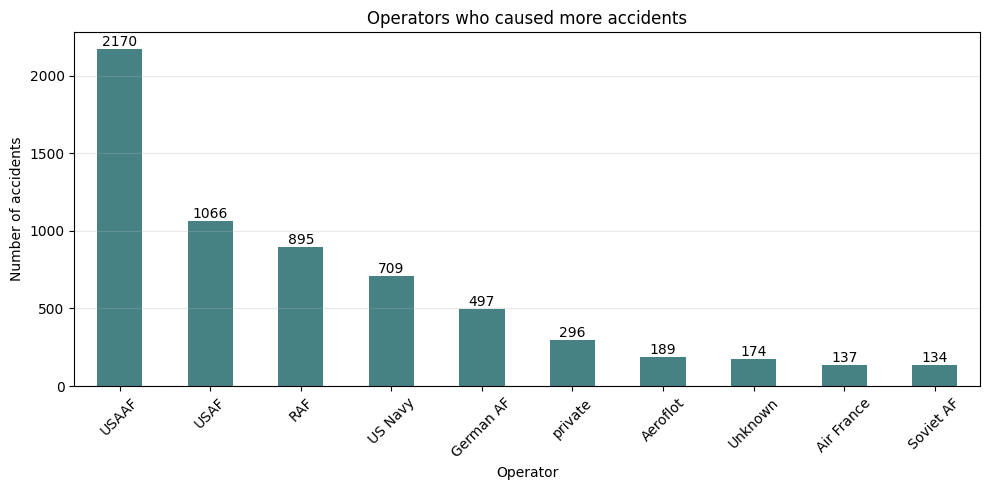

In [20]:
# bar char thaT shows operators who caused more accidents
plt.figure(figsize=(10,5))
top_operator.plot(kind='bar', color='#468284')
for index,value in enumerate(top_operator):
    plt.annotate(str(int(value)), xy=(index,value), ha='center', va='bottom')
plt.title('Operators who caused more accidents')
plt.xlabel('Operator')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

##### COMMENT
The bar char shows that USAAF is the operator causing the most accidents, with 2170 total accidents worldwide, followed by USAF with 1066.

In [21]:
'''
How many operators had only one accident
''' 
# Count how many operators made exactly one incident.
one_accidents_operator = (accidents_by_operator == 1).sum()
print(f'{one_accidents_operator}  operators had one accident')

4038  operators had one accident


In [22]:
'''
Considering the operators who had an accident, 
I check who made 0 fatalities
'''

# Count how many operators had exactly one incident
operators_one_accident = accidents_by_operator[accidents_by_operator == 1].index

# Filters the dataframe to include only incidents from these operators
df_operators_one_accident = df[df['operator'].isin(operators_one_accident)]

# Count how many of these operators caused zero deaths
operators_zero_fatalities = df_operators_one_accident.groupby('operator')['fatalities'].sum()
safest_operators = operators_zero_fatalities[operators_zero_fatalities == 0].index

print(f'The safest operators are {len(safest_operators)}\n')

# Print the operators who caused zero fatalities
print("Operators with 0 fatalities:")
for operator in safest_operators:
    print(operator)

The safest operators are 2607

Operators with 0 fatalities:
, op.for UN
09 Charlie
1982-047 LLC
2M Leasing
40-Mile Air
987 Investments
A.R. Wings
AAA Investments
ABA Aviation Resources
ABS Equipment Leasing
ABX Air
ACAPSA
ACM Praha
ACS
ACS Skydiving Center
ACSA - Air Century
ACT Airlines
ACT Airlines, opf Saudi Arabian
ACT Airlines, opf Turkish Cargo
AIEP
AIM Air
ALAS
ALAS Guaranies
ALCI
ALCI Aviation
ALCI Aviation, opf North Star Air Cargo
ALCON
ALE - Aerolineas Ejecutivas
ALROSA
ALTA
AMA Flyg
AMAZ
AMF Corp.
ANA Wings
ANHSA
ANK- Air Nippon
ANSA
AOM French Airlines, op.for Cubana
APISA Air Carga
ARCO Bermuda
ART 21631
ASA
ASF Belgique
ASL Airlines Belgium
ASL Airlines Hungary
ASSL
ASTAR Air Cargo
AT Aero LLC
AT&T Alascom
ATMA Airlines
ATR
AVAir
AVENSA, op.for VIASA
AW Aerowest
AX Transporter
Aaron Enterprises Corporation
Aaxico Airlines, op.for Puerto Rican American Airlines
Abeer Air Services
Abelag Aviation
Aboitiz Air
Abu Dhabi AF
Abyssinian Flight Services, opf UN WFP
Acme Leasing


#### Which operator experienced the most deaths

In [23]:
'''
number of deaths for each operator
'''
operator_deaths = df.groupby('operator')['fatalities'].sum().idxmax()
accidents_operator_deaths =df[df['operator']== operator_deaths]
deaths = accidents_operator_deaths['fatalities'].sum()
print(f'{operator_deaths} has caused {deaths} deaths')

USAF has caused 5514.0 deaths


#### Where USAAF caused the most accidents

In [24]:
# USAAF' accidents
accidents_USAAF = df[df['operator']=='USAAF']
accidents_USAAF_country = accidents_USAAF['country'].value_counts()
accidents_country= accidents_USAAF_country.idxmax()
# top ten country
top_10_countries = accidents_USAAF_country.head(10)
print(f'\nUSAAF has caused {top_10_countries.max()} deaths in {accidents_country}\n')
print(top_10_countries)



USAAF has caused 383 deaths in USA

country
USA            383
China          288
India          246
Myanmar        180
U.K.           128
France         114
P.N. Guinea    107
Italy           93
Germany         89
Philippines     81
Name: count, dtype: int64


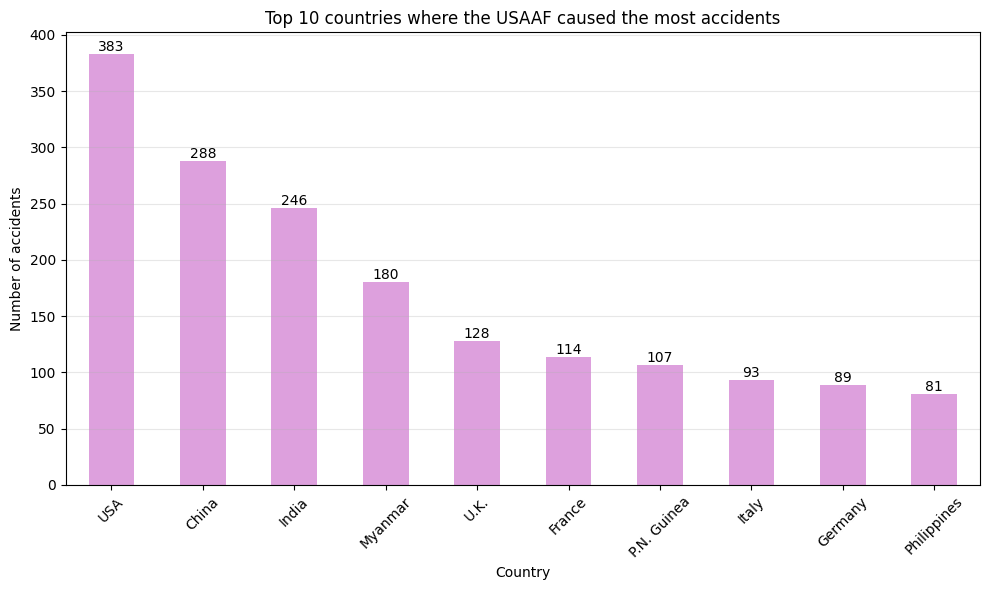

In [25]:
# Bar char that shows where the USAAF caused the most accidents
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='#DDA0DD')
for index,value in enumerate(top_10_countries):
    plt.annotate(str(int(value)), xy=(index,value), ha='center', va='bottom')
plt.title('Top 10 countries where the USAAF caused the most accidents')
plt.xlabel('Country')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

##### COMMENT
USAAF is the operator who has caused most of the accidents in the U.S. and China

#### Which type of vehicle caused the most deaths and which the least

In [26]:
'''
vehicle that caused the most deaths
'''
deaths_vehicle = df.groupby('type')['fatalities'].sum()
vehicle_more_deaths = deaths_vehicle.idxmax()
most_deaths = deaths_vehicle.max()
top_10 = deaths_vehicle.nlargest(10)
print(f'\n{vehicle_more_deaths} is the worst vehicle, it caused {most_deaths} deaths\n')
print(top_10)


Douglas C-47A (DC-3) is the worst vehicle, it caused 5679.0 deaths

type
Douglas C-47A (DC-3)        5679.0
Douglas C-47 (DC-3)         2600.0
Douglas C-47B (DC-3)        1969.0
Tupolev Tu-154M             1395.0
Ilyushin Il-18V             1356.0
DC-9-32                     1207.0
Lockheed C-130H Hercules    1192.0
Antonov An-26               1163.0
Junkers Ju-52/3m            1110.0
Douglas DC-6B               1040.0
Name: fatalities, dtype: float64


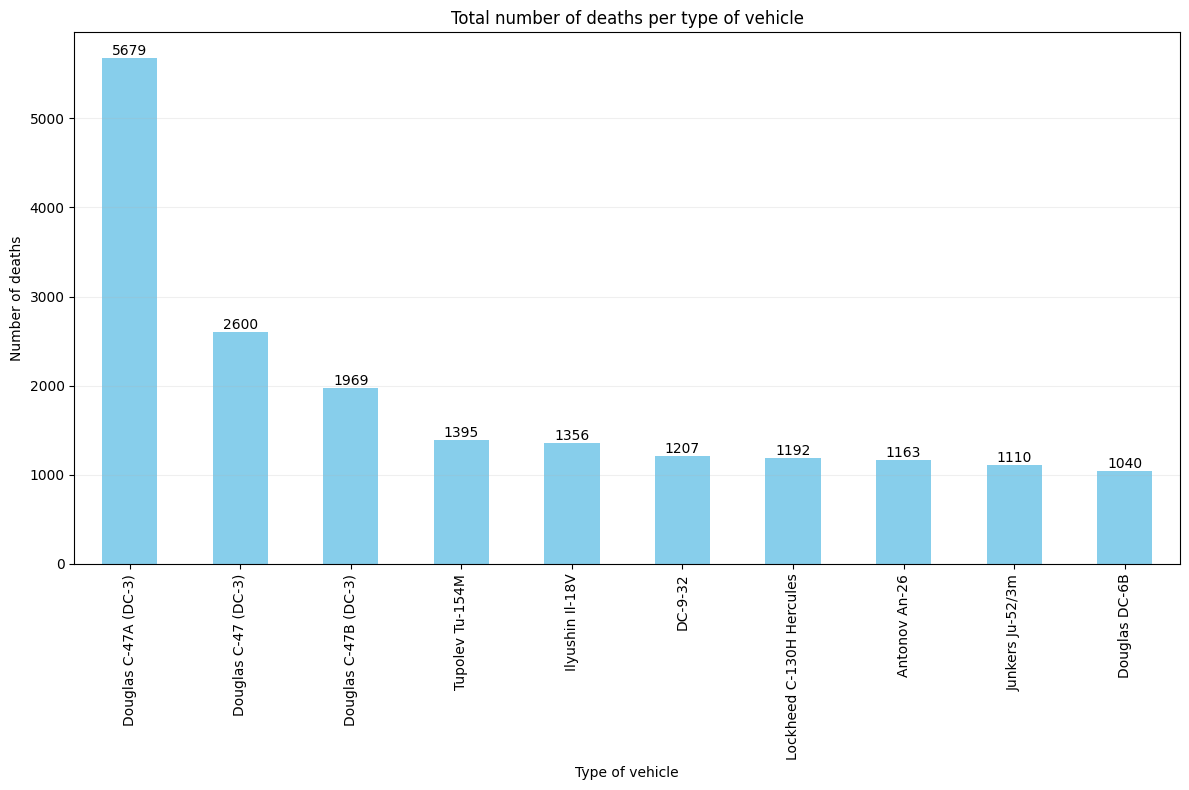

In [27]:
# bar chart of total number of deaths per vehicle 
plt.figure(figsize=(12,8))
top_10.plot(kind='bar', color='skyblue')
for index,value in enumerate(top_10):
    plt.annotate(str(int(value)), xy=(index,value), ha='center', va='bottom')
plt.title('Total number of deaths per type of vehicle')
plt.xlabel('Type of vehicle')
plt.ylabel('Number of deaths')
plt.grid(axis='y', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### COMMENT
The vehicle that caused the most deaths was the Douglas C-47A (DC-3) with 5679 deaths

In [28]:
'''
vehicle that caused fewer deaths
'''
vehicle_zero_deaths = deaths_vehicle[deaths_vehicle==0].index.tolist()
n_vehicle_zero_deaths=len(vehicle_zero_deaths)
print(f'{n_vehicle_zero_deaths} caused zero deaths')
print('The following vehicle are the safest:')
vehicle_zero_deaths

1390 caused zero deaths
The following vehicle are the safest:


['A.W. AW-650 Argosy 101',
 'A.W. AW-650 Argosy 102',
 'A.W. AW-650 Argosy 222',
 'A.W. AW.27 Ensign I',
 'A.W. Argosy IA',
 'ATR 42-200',
 'ATR 42-310',
 'ATR 42-320 (F)',
 'ATR 42-500 ?',
 'ATR 42-600',
 'ATR 72-212 (F)',
 'ATR 72-600 (72-212A)',
 'Airbus',
 'Airbus A300',
 'Airbus A300B2-202',
 'Airbus A300B4',
 'Airbus A300B4-103',
 'Airbus A300B4-120',
 'Airbus A300B4-203 (F)',
 'Airbus A300B4-601',
 'Airbus A300B4-605R',
 'Airbus A300B4-605R (F)',
 'Airbus A300B4-605R ?',
 'Airbus A300B4-620',
 'Airbus A300B4-620 ?',
 'Airbus A300B4-622R (F)',
 'Airbus A300F4-605R',
 'Airbus A310',
 'Airbus A310-203',
 'Airbus A310-300',
 'Airbus A310-304 (F)',
 'Airbus A310-304ET',
 'Airbus A310-308',
 'Airbus A310-325',
 'Airbus A319-111',
 'Airbus A319-112',
 'Airbus A319-114',
 'Airbus A319-115 (WL)',
 'Airbus A319-131',
 'Airbus A319-132',
 'Airbus A320 ?',
 'Airbus A320-214',
 'Airbus A320-214 (WL)',
 'Airbus A320-233',
 'Airbus A320-251N',
 'Airbus A320-271N',
 'Airbus A321',
 'Airbus A321

#### Where DOUGLAS C-47A (DC-3) caused the most accidents.

In [29]:
'''
number of accidents by DOUGLAS C-47A (DC-3) by country
'''
accidents_douglas = df[df['type']=='Douglas C-47A (DC-3)']
accidents_country_douglas = accidents_douglas['country'].value_counts()
most_accidents_douglas = accidents_country_douglas.max()
country =accidents_country_douglas.idxmax()
top_10 = accidents_country_douglas.head(10)
print(f'Douglas C-47A (DC-3) has caused {most_accidents_douglas} accidents in {country}.\n')
print(top_10)

Douglas C-47A (DC-3) has caused 229 accidents in USA.

country
USA            229
Myanmar        106
India          102
U.K.            98
France          95
Germany         84
P.N. Guinea     84
Philippines     82
Netherlands     60
China           57
Name: count, dtype: int64


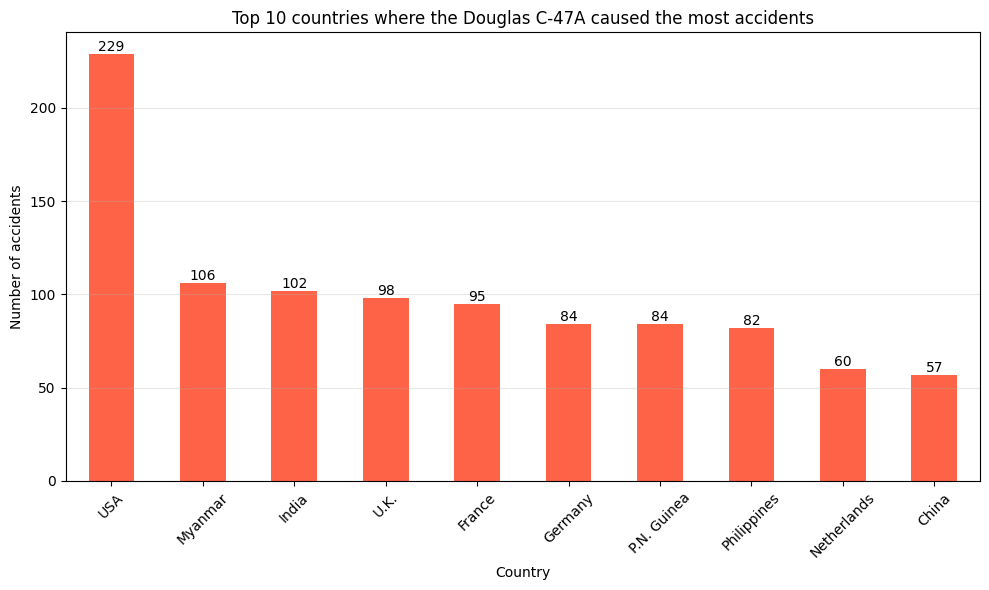

In [30]:
# bar chart that shows the top 10 countries where the Douglas C-47A caused the most accidents
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar', color='#FF6347')
for index,value in enumerate(top_10):
    plt.annotate(str(int(value)), xy=(index,value), ha='center', va='bottom')
plt.title('Top 10 countries where the Douglas C-47A caused the most accidents')
plt.xlabel('Country')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

##### COMMENT
Douglas C-47A (DC-3) is the type of vehicle that has caused the highest number of accidents, it caused 229 in the US, 106 in Myanmar and 102 in India.

#### How  incidents evolved after 11th september 2001 

In [31]:
'''
Filtering the dataframe to include only incidents after September 11, 2001
''' 
accidents_after_11 = df[df['date'] >= '11-SEP-2001']
accidents_by_year = accidents_after_11.resample('YE', on='date').size()
accidents_by_year

date
2001-12-31     77
2002-12-31    221
2003-12-31    217
2004-12-31    209
2005-12-31    219
2006-12-31    221
2007-12-31    221
2008-12-31    218
2009-12-31    204
2010-12-31    189
2011-12-31    191
2012-12-31    176
2013-12-31    207
2014-12-31    228
2015-12-31    222
2016-12-31    207
2017-12-31    196
2018-12-31    233
2019-12-31    245
2020-12-31    203
2021-12-31    182
2022-12-31    167
2023-12-31     56
Freq: YE-DEC, dtype: int64

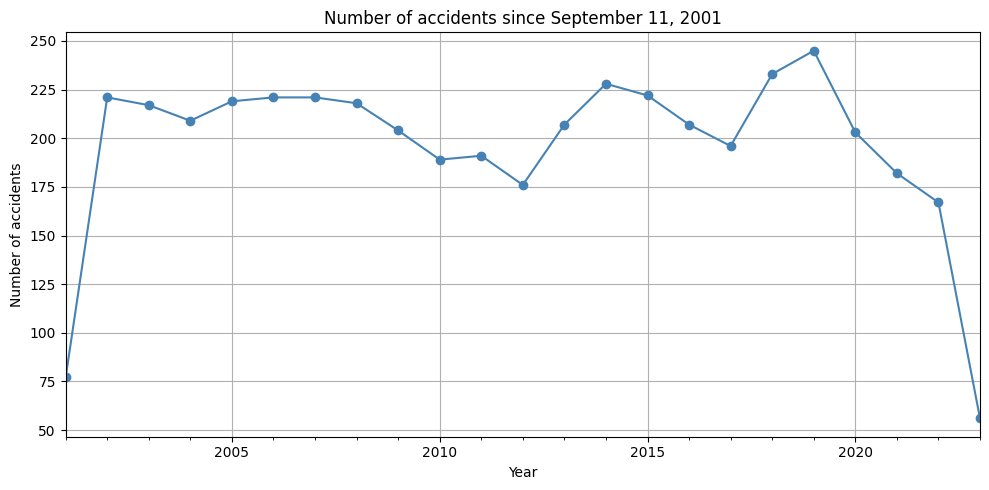

In [32]:
# line chart that shows the trend of accidents since September 11, 2001
plt.figure(figsize=(10, 5))
accidents_by_year.plot(marker='o', color='#4682B4')
plt.title('Number of accidents since September 11, 2001')
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

##### COMMENT
Since the twin tower attack on September 11, 2001, accidents have increased; 77 crashes occurred in 2001, but in the following years the number of crashes was around 200, peaking at 245 in 2019, then dropped by 2023 with only 56 crashes.

### USA analysis

#### Year in which most accidents occurred

In [33]:
'''
accidents in USA
'''
accidents_usa = df[df['country'] == 'USA']
accidents_by_year_usa = accidents_usa['year'].value_counts().sort_index()
year_most_accidents_usa= accidents_by_year_usa.idxmax()
accidents_max_usa = accidents_by_year_usa.max()
print(f'In {year_most_accidents_usa} there were {accidents_max_usa} accidents, the largest number ever recorded.')

In 1944 there were 180 accidents, the largest number ever recorded.


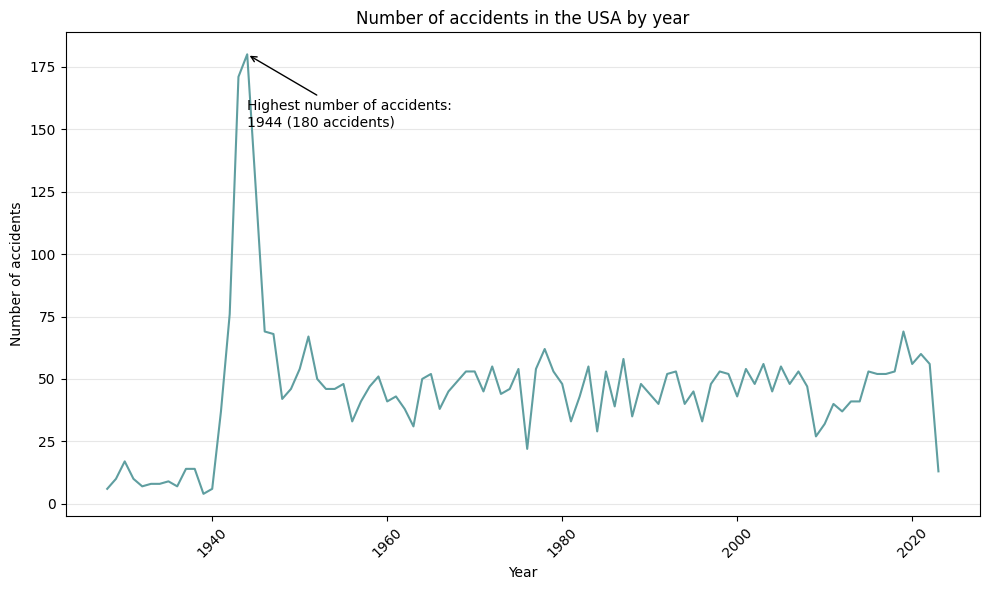

In [34]:
# line chart that shows the trend of accidents in the USA
plt.figure(figsize=(10,6))
accidents_by_year_usa.plot(kind='line', color='#5F9EA0')
plt.title('Number of accidents in the USA by year')
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.annotate(f'Highest number of accidents:\n{year_most_accidents_usa} ({accidents_max_usa} accidents)',
             xy=(year_most_accidents_usa, accidents_max_usa),
             xytext=(year_most_accidents_usa, accidents_max_usa * 0.9),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='left', verticalalignment='top')
plt.show()

##### COMMENT
In 1944 in the U.S. there were 180 accidents, caused by World War II.

### Italy analysis

#### Year in which most accidents occurred

In [35]:
'''
accidents in Italy, year in which most accidents occurred
'''
italy_accidents = df[df['country']=='Italy']
accidents_year_italy = italy_accidents['year'].value_counts().sort_index()
year_most_accidents = accidents_year_italy.idxmax()
accidents_max_italy = accidents_year_italy.max()
print(f'In {year_most_accidents} there were {accidents_max_italy} accidents, the largest number ever recorded.')

In 1943 there were 57 accidents, the largest number ever recorded.


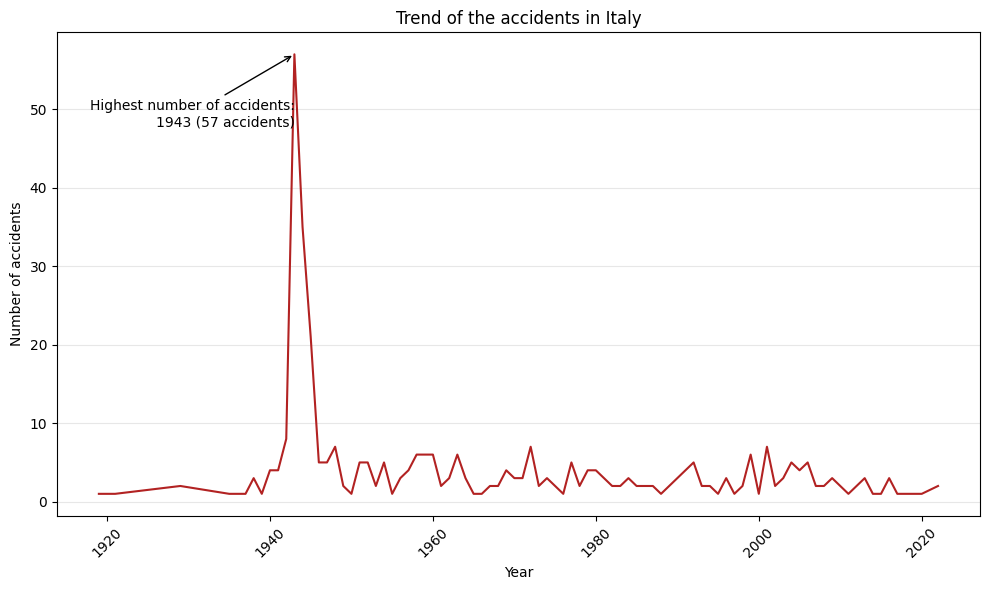

In [36]:
#  line chart that shows the trend of the accidents in Italy
plt.figure(figsize=(10, 6))
accidents_year_italy.plot(kind='line', color='#B22222')
plt.title('Trend of the accidents in Italy')
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.annotate(f'Highest number of accidents:\n{year_most_accidents} ({accidents_max_italy} accidents)',
             xy=(year_most_accidents, accidents_max_italy),
             xytext=(year_most_accidents, accidents_max_italy * 0.9),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='right', verticalalignment='top')
plt.show()

##### COMMENT
In Italy the highest number of accidents was in 1943 with 57 accidents, caused by the second world war.

#### Locations where most accidents occurred

In [37]:
accidents_location_italy = italy_accidents['location'].value_counts()
top_10_locations = accidents_location_italy.head(10)
top_10_locations

location
near Sicily             16
Roma-Fiumicino A...     16
Roma-Ciampino Ai...     15
Sicily                   9
Milano-Linate Ai...      8
near Gela, Sicily        6
Florence-Peretol...      5
near Catania, Sicily     5
Milano-Malpensa ...      5
0                        5
Name: count, dtype: int64

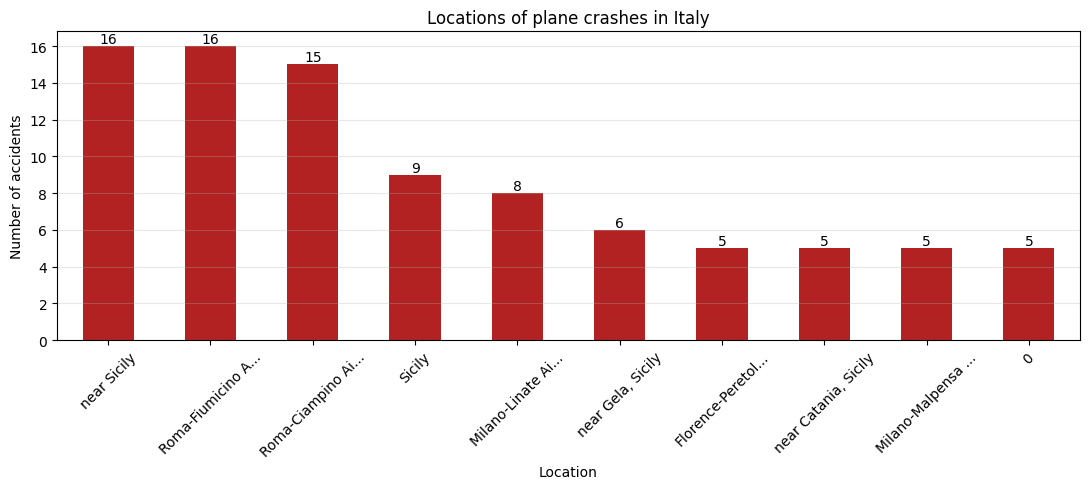

In [38]:
# bar chart that show the number of accidents for each location in Italy
plt.figure(figsize=(11, 5))
top_10_locations.plot(kind='bar', color='#B22222')
for index,value in enumerate(top_10_locations):
    plt.annotate(str(int(value)), xy=(index,value), ha='center', va='bottom')
plt.title('Locations of plane crashes in Italy')
plt.xlabel('Location')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

##### COMMENT
There were 16 incidents near Sicily and Roma-Fiumicino Airport, follow by Roma-Ciampino with 15 accidents.

#### Worst operator in italy

In [39]:
''' group operator by fatalities'''
deaths_operator = italy_accidents.groupby('operator')['fatalities'].sum()
operator_more_deaths= deaths_operator.idxmax()
most_deaths = deaths_operator.max()
print(f'{operator_more_deaths} is the worst operator, it caused {most_deaths} deaths')
top_10 = deaths_operator.nlargest(10).sort_values(ascending=True)

Alitalia is the worst operator, it caused 296.0 deaths


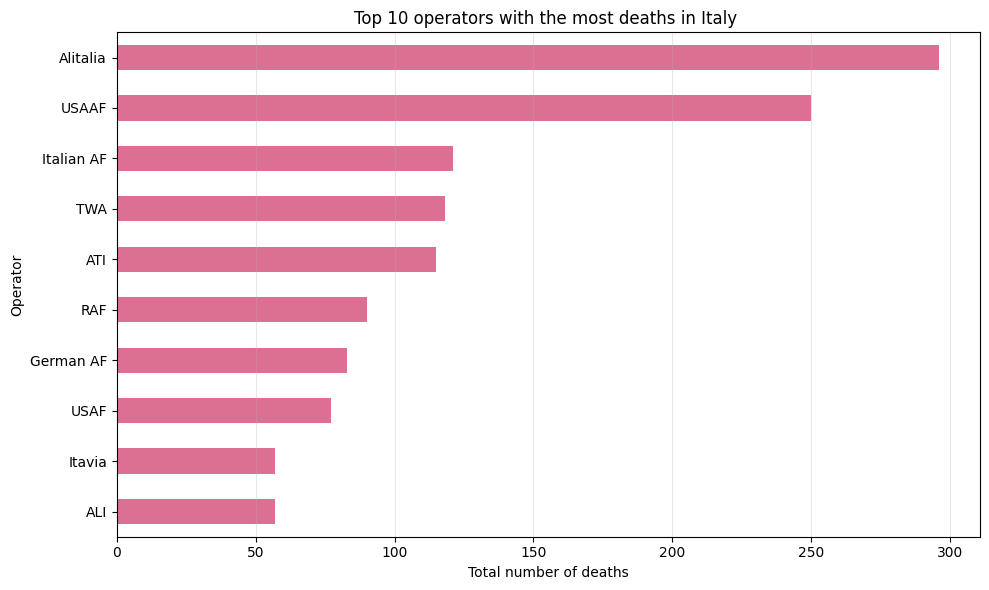

In [40]:
# Bar chart showing the total number of deaths per operator in Italy
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh', color='#DB7093')
plt.title('Top 10 operators with the most deaths in Italy ')
plt.ylabel('Operator')
plt.xlabel('Total number of deaths')
plt.grid(axis='x',linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

##### COMMENT
Alitalia is the worst operator in Italy, it caused around 300 victims, follow by USAAF that claimed 250 lives, which has been in the previous analyses the operator with the most accidents.

#### Have deaths decreased over time? 

In [41]:
'''
group year by fatalities
'''
deaths_by_year = df.groupby('year')['fatalities'].sum()
deaths_by_year.loc[1943:1945]

year
1943    2416.0
1944    3375.0
1945    2969.0
Name: fatalities, dtype: float64

In [42]:
deaths_by_year.loc[1966:1971]

year
1966    1901.0
1967    1827.0
1968    2038.0
1969    2028.0
1970    1917.0
1971    1935.0
Name: fatalities, dtype: float64

In [43]:
deaths_by_year.loc[1980:1989]

year
1980    1896.0
1981    1268.0
1982    1435.0
1983    1700.0
1984     780.0
1985    2599.0
1986    1375.0
1987    1606.0
1988    1810.0
1989    1999.0
Name: fatalities, dtype: float64

In [44]:
deaths_by_year.loc[1990:2000]

year
1990    1124.0
1991    1677.0
1992    1922.0
1993    1518.0
1994    1579.0
1995    1631.0
1996    2184.0
1997    1536.0
1998    1258.0
1999     846.0
2000    1221.0
Name: fatalities, dtype: float64

In [45]:
deaths_by_year.loc[2000:2010]

year
2000    1221.0
2001     745.0
2002    1189.0
2003    1081.0
2004     613.0
2005    1096.0
2006    1192.0
2007     627.0
2008     726.0
2009     860.0
2010    1017.0
Name: fatalities, dtype: float64

In [46]:
deaths_by_year.loc[2011:2023]

year
2011     690.0
2012     468.0
2013     355.0
2014    1210.0
2015     678.0
2016     566.0
2017     278.0
2018     961.0
2019     421.0
2020     332.0
2021     277.0
2022     283.0
2023      88.0
Name: fatalities, dtype: float64

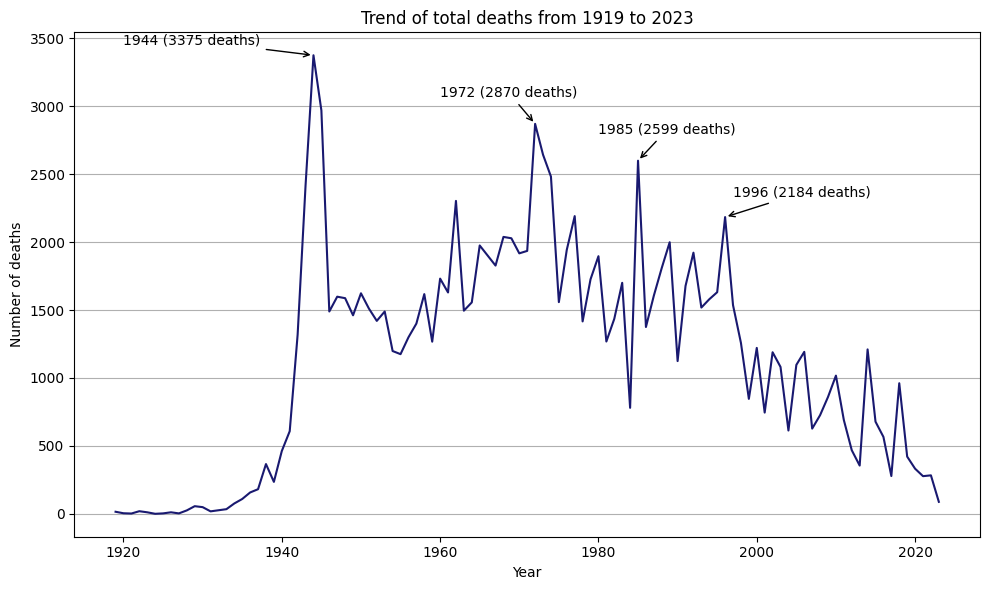

In [53]:
# line chart that show the trend of deaths from 1919 to 2023
plt.figure(figsize=(10, 6))
deaths_by_year.plot(kind='line', color='#191970', linestyle='-')
plt.title('Trend of total deaths from 1919 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of deaths')
plt.annotate('1944 (3375 deaths)',
             xy=(1944, deaths_by_year.loc[1944]),
             xytext=(1920, deaths_by_year.loc[1944] + 80),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('1972 (2870 deaths)',
             xy=(1972, deaths_by_year.loc[1972]),
             xytext=(1960, deaths_by_year.loc[1972] + 200),  
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('1985 (2599 deaths)',
             xy=(1985, deaths_by_year.loc[1985]),
             xytext=(1980, deaths_by_year.loc[1985] + 200), 
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('1996 (2184 deaths)',
             xy=(1996, deaths_by_year.loc[1996]),
             xytext=(1997, deaths_by_year.loc[1996] + 150), 
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [48]:
# Calculates the mean and standard deviation of the number of deaths per year.
mean_deaths_by_year = deaths_by_year.mean()
sd_deaths= deaths_by_year.std()
high_peaks = deaths_by_year[deaths_by_year > (mean_deaths_by_year + 1.25 * sd_deaths)]
print("Years with high peaks in the number of deaths:")
print(high_peaks)

Years with high peaks in the number of deaths:
year
1943    2416.0
1944    3375.0
1945    2969.0
1962    2303.0
1972    2870.0
1973    2643.0
1974    2482.0
1977    2191.0
1985    2599.0
1996    2184.0
Name: fatalities, dtype: float64


#####  COMMENT:
The highest number of deaths occurred between 1943 and in 1945, because of World War II and the conflicts that occurred  where more than 8000 people died.

Also between 1972 and 1974 more than 6,000 fatalities occurred, some of the most notable accidents:
- 1972: Pan Am Flight 103 crash (270 fatalities)
- 1973: Pan Am Flight 1104 derailment in Rome (78 fatalities)
- 1974: Turkish Airlin flight 981 derailment (346 fatalities)

Another year is 1985 where more than 2,500 deaths occurred; there were several accidents, including:
- Arrow Air disaster: crashed in Canada (256 deaths);
- JAL Flight 123 crash: a Boeing crashed into a mountain (520 deaths);
- Air India Flight 182 air disaster: a Boeing exploded due to a bomb onboard (329 deaths).

From the graph one another peak can be seen: 1996, with more than 2,000 deaths:
- TWA Flight 800 disaster: crashed into the Atlantic Ocean (230 deaths);
- Birgenair Flight 301 crash: crashed after the takeoff (189 deaths);
- ValuJet Flight 592 disaster: due to a fire on board (110 deaths).

Between 2018 and 2019 there was a decrease of almost 500 deaths, this was due to the Covid-19 where our mobility was limited and so also decreased the number of deaths from air accidents.

Eventhough the high number of flights, in the last decade the number of deaths from air accidents has deeply reduced, thanks to the study of new safety systems and the new evolving technologies.